<a href="https://colab.research.google.com/github/ahmed-dardery/ML-Assignment/blob/main/Assignment%203/CNN_ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(RAW_X_train, RAW_y_train), (RAW_X_test, RAW_y_test) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from keras.layers.normalization import BatchNormalization
import seaborn as sns

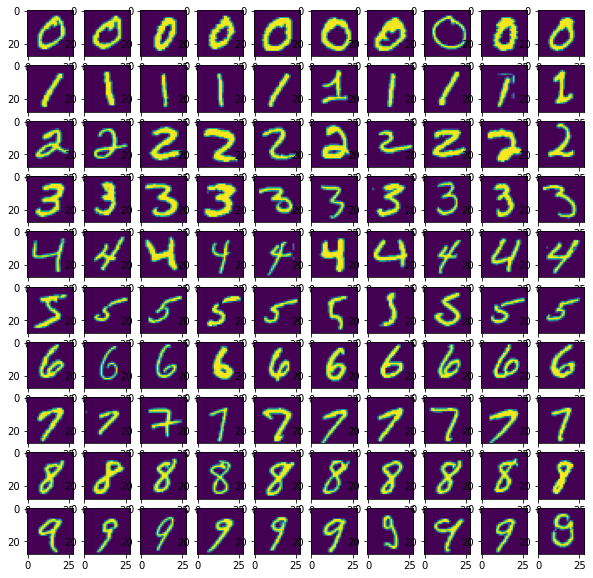

In [ ]:
count_per_val = 10
f, axarr = plt.subplots(count_per_val,10,figsize=(10,10))
for i in range (0,10):
  idx = (RAW_y_train == i).nonzero()
  np.random.shuffle(idx)
  for j in range(count_per_val):
    axarr[i, j].imshow(RAW_X_train[idx[0][j]])
  

In [ ]:
RAW_X_train.shape

(60000, 28, 28)

In [ ]:
normalized_X_train = RAW_X_train/255
normalized_test = RAW_X_test/255
normalized_test[0][7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.32941176, 0.7254902 , 0.62352941, 0.59215686,
       0.23529412, 0.14117647, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

To add future support for colored photos (RGB)

In [ ]:
X_train = normalized_X_train.reshape(*normalized_X_train.shape,1)
X_test = normalized_test.reshape(*normalized_test.shape,1)
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

One hot encode the output

In [ ]:
y_train = to_categorical(RAW_y_train)
y_test = to_categorical(RAW_y_test)

In [ ]:
models = [None] * 4
weights = [None] * 4

In [ ]:
models[0] = Sequential()
models[0].add(Conv2D(64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
models[0].add(Conv2D(32, kernel_size=3, activation='relu'))
models[0].add(Flatten())
models[0].add(Dense(y_train.shape[1], activation='softmax'))

In [ ]:
models[1] = Sequential()
models[1].add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
models[1].add(Conv2D(32, kernel_size=3, activation='relu'))
models[1].add(MaxPooling2D(pool_size=(2,2)))
models[1].add(BatchNormalization())
models[1].add(Conv2D(64, kernel_size=3, activation='relu'))
models[1].add(Conv2D(64, kernel_size=3, activation='relu'))
models[1].add(MaxPooling2D(pool_size=(2,2)))
models[1].add(BatchNormalization())
models[1].add(Flatten())
models[1].add(Dense(y_train.shape[1], activation='softmax'))

In [ ]:
models[2] = Sequential()
models[2].add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=X_train.shape[1:]))
models[2].add(Conv2D(filters=32, kernel_size = (3,3), activation="relu"))
models[2].add(MaxPooling2D(pool_size=(2,2)))
models[2].add(BatchNormalization())
models[2].add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
models[2].add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
models[2].add(MaxPooling2D(pool_size=(2,2)))
models[2].add(BatchNormalization())    
models[2].add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
models[2].add(MaxPooling2D(pool_size=(2,2)))
models[2].add(Flatten())
models[2].add(BatchNormalization())
models[2].add(Dense(512,activation="relu"))
models[2].add(Dense(y_train.shape[1],activation="softmax"))

In [ ]:
models[3] = Sequential()
models[3].add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=X_train.shape[1:]))
models[3].add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
models[3].add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
models[3].add(MaxPooling2D(pool_size=(2,2)))
models[3].add(BatchNormalization())   
models[3].add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
models[3].add(MaxPooling2D(pool_size=(2,2)))
models[3].add(BatchNormalization())
models[3].add(Flatten())
models[3].add(Dense(512,activation="relu"))
models[3].add(Dense(y_train.shape[1],activation="softmax"))

In [ ]:
for i in range(len(models)):
  models[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  weights[i] = models[i].get_weights()

In [ ]:
folds = 5
epochs_number = 5
kf = StratifiedKFold(n_splits = folds, shuffle = True)

acc = np.zeros(len(models))
best_model = 0
best_accuracy = 0
fold_number = 0
for train_index, val_index in kf.split(X_train, RAW_y_train):
  print("Fold ", fold_number)
  fold_number += 1
  for i, model in enumerate(models):
    model.set_weights(weights[i])
    print("Model ", i)
    hist = model.fit(X_train[train_index], y_train[train_index], validation_data=(X_train[val_index], y_train[val_index]), epochs=epochs_number)
    accuracy = hist.history['accuracy'][-1]
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = model

Fold  0
Model  0
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1292 - accuracy: 0.9612 - val_loss: 0.0643 - val_accuracy: 0.9802
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9864 - val_loss: 0.0560 - val_accuracy: 0.9847
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0569 - val_accuracy: 0.9846
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0688 - val_accuracy: 0.9817
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0741 - val_accuracy: 0.9840
Model  1
Epoch 1/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0881 - accuracy: 0.9720 - val_loss: 0.0545 - val_accuracy: 0.9825
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0

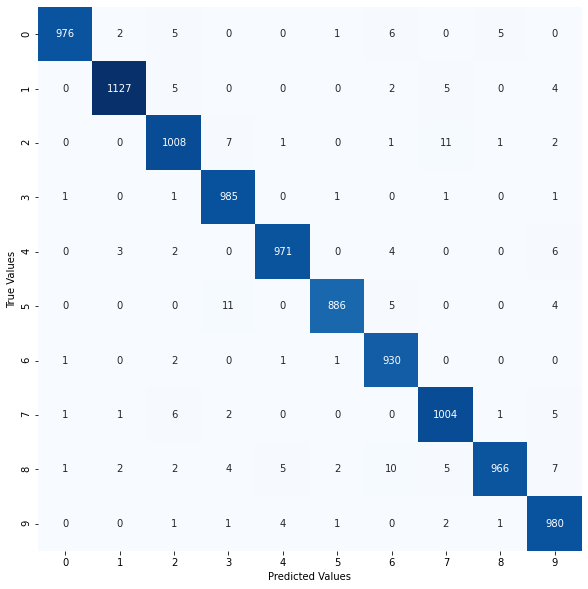

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = best_model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


In [ ]:
predicted=np.argmax(model.predict(X_test), axis=1)
predicted.shape

(10000,)

In [ ]:
incorrect = np.nonzero(predicted != RAW_y_test)[0] #indices of incorrect values
correct = np.nonzero(predicted == RAW_y_test)[0]
len(incorrect),len(correct) 

(152, 9848)